### Вариант 25
Q(x,y) = A * (x^a1) * (y^a2)  
A = 24   
a1 = 1/2  
a2 = 1/3  
w1 = 2  
w2 = 8  
I = 200  

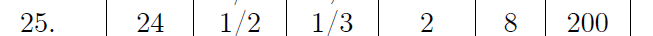



In [21]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [22]:
while True:
    try:
        Q = input("Введите производственную функцию  Q(x,y): ")
        A = int(input("Введите A: "))
        a1 = input("Введите a1: ")
        a2 = input("Введите a2: ")
        w1 = int(input("Введите стоимость единицы первого ресурса (w1): "))
        w2 = int(input("Введите стоимость единицы второго ресурса (w2): "))
        I = int(input("Введите бюджетное ограничение на ресурсы (I): "))
        a1 = float(Fraction(a1))
        a2 = float(Fraction(a2))
        Q_S = sympify(Q)
        break
    except Exception:
        print("Ошибка ввода!")

Введите производственную функцию  Q(x,y): A * (x^a1) * (y^a2)
Введите A: 24
Введите a1: 1/2
Введите a2: 1/3
Введите стоимость единицы первого ресурса (w1): 2
Введите стоимость единицы второго ресурса (w2): 8
Введите бюджетное ограничение на ресурсы (I): 200


In [23]:
print(Q)
print()
print(A)
print()
print(a1)
print()
print(a2)
print()
print(w1)
print()
print(w2)
print()
print(I)

A * (x^a1) * (y^a2)

24

0.5

0.3333333333333333

2

8

200


In [24]:
U = 'A * x^a1 * y^a2 - w1*x - w2*y'
U_S = sympify(U)
U_S = U_S.subs([("A", A), ("a1", a1), ("a2", a2), ("w1", w1), ("w2", w2)])
U_S

24*x**0.5*y**0.333333333333333 - 2*x - 8*y

In [25]:
Q_S = Q_S.subs([("A", A), ("a1", a1), ("a2", a2)])
Q_S

24*x**0.5*y**0.333333333333333

### Ограничения

In [26]:
from scipy.optimize import Bounds
# x > 0, y > 0
bounds = Bounds([0.001, 0.001], [np.inf, np.inf])
#линейные ограничения
from scipy.optimize import LinearConstraint
# 0 <= w1X + w2Y <= I
linear_constraint = LinearConstraint([[w1, w2]], [0.01], [I])


In [27]:
result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_S)(x[0], x[1]), x0=(1,1), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 1.0240000000000006e-08
 barrier_tolerance: 1.0240000000000006e-08
          cg_niter: 28
      cg_stop_cond: 1
            constr: [array([199.99999998]), array([60.00000018,  9.99999995])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 2.0440680980682373
               fun: -200.5163043890408
              grad: array([-1.3376358 , -5.35054321])
               jac: [array([[2, 8]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([ 8.0266563e-11, -2.0068228e-11])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 51
              nhev: 0
               nit: 27
             niter: 27
              njev: 17
        optimality: 8.026656304377531e-11
            status: 1
           success: True
         tr_radius: 1647975620.145237
                 v: [array([0.6688179]), array([-

In [28]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun
print(extremum)
print(x_max, y_max)

200.5163043890408
60.000000175181825 9.999999954290725


#### Графики

<Figure size 432x288 with 0 Axes>

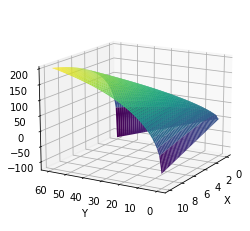

In [29]:
plt.figure()
ax = plt.figure().add_subplot(projection='3d')
x = np.linspace(0, x_max)
y = np.linspace(0, y_max)
X, Y = np.meshgrid(x, y)
Z = lambdify(['x', 'y'], U_S)(X, Y)

ax.view_init(15, -150)
ax.plot_surface(Y, X, Z,rstride = 1, cstride = 1, alpha = 1, cmap = 'viridis')
plt.xlabel("X")
plt.ylabel("Y")
ax.invert_xaxis()

In [30]:
result_2 = optimize.minimize(lambda x: -lambdify(["x", "y"], U_S)(x[0], x[1]), x0=(1,1), method="BFGS")
result_2

      fun: -863.9999999345009
 hess_inv: array([[3448.24415471,  555.24973131],
       [ 555.24973131,  142.01172982]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 27
     njev: 31
   status: 0
  success: True
        x: array([1295.98179258,  215.99807735])

In [31]:
x_max_2, y_max_2 = result_2.x[0], result_2.x[1]
print(x_max_2, y_max_2)

1295.9817925760437 215.99807735318979


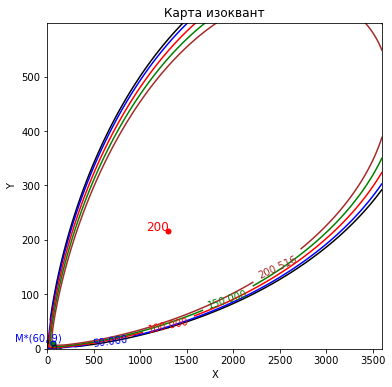

In [32]:
delta = 1
x = np.arange(0, 60 * x_max, delta)
y = np.arange(0, 60 * y_max, delta)
X, Y = np.meshgrid(x, y)
z = lambdify(["x", "y"], U_S)(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, z, levels = (20, 50, 100, 150, extremum), colors = ("black", "blue",
                                                                       "red",
                                                                           "green", "brown"))
ax.clabel(CS, inline=True, fontsize=10)
x = np.linspace(2, (I/w1))
y_treug = (I - w1 * x) / w2
y_2 = 0
fig2 = ax.fill_between(x, y_2, y_treug)
fig2.set_facecolor('orange')
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title("Карта изоквант")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="green")
plt.text(x_max + 90,y_max + 5,f'M*{int(x_max), int(y_max)}',horizontalalignment='right', color="blue")
plt.plot(x_max_2, y_max_2, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(x_max_2 + 10,y_max_2 + 2,f'{int(extremum)}',horizontalalignment='right', color="red", fontsize=12)
plt.show()

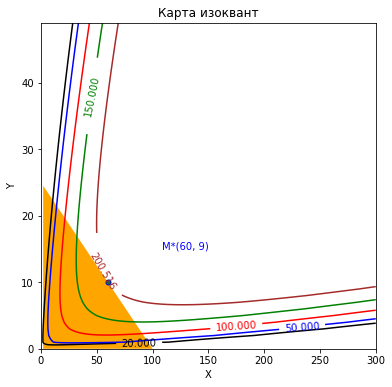

In [33]:
delta = 1
x = np.arange(0, 5* x_max, delta)
y = np.arange(0, 5 * y_max, delta)
X, Y = np.meshgrid(x, y)
z = lambdify(["x", "y"], U_S)(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, z, levels = (20, 50, 100, 150, extremum), colors = ("black", "blue",
                                                                       "red",
                                                                           "green", "brown"))
ax.clabel(CS, inline=True, fontsize=10)
x = np.linspace(2, (I/w1))
y_treug = (I - w1 * x) / w2
y_2 = 0
fig2 = ax.fill_between(x, y_2, y_treug)
fig2.set_facecolor('orange')
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title("Карта изоквант")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="green")
plt.text(x_max + 90,y_max + 5,f'M*{int(x_max), int(y_max)}',horizontalalignment='right', color="blue")
# plt.plot(x_max_2, y_max_2, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
# plt.text(x_max_2 + 10,y_max_2 + 2,f'{int(extremum)}',horizontalalignment='right', color="red", fontsize=12)
plt.show()

In [23]:
print("Результаты: ")
print(f"Оптимальный план: {int(x_max), int(y_max)}, Макс прибыль = {extremum}")

Результаты: 
Оптимальный план: (60, 9), Макс прибыль = 200.5163043890408
